# Logistic Regression
`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then be mapped to two or more discrete classes.

Logistic regression can be used for:

1. Binary Classification
2. Multi-class Classification
3. One-vs-Rest Classification


use for **`Linear`** and **`Classification Problems`**

## Assumptions of Logistic regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# split data
X = df.drop('survived', axis=1)
y = df['survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # here we can use train_size=0.8

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

## As model can't `understand` male or `female` <br>
## So, we will do `Label Encoding` or Data `Pre-Processing`

In [10]:
# remomving deck column
df.drop('deck', axis=1, inplace=True)

# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# impute missing values in embarked and embark town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encoding the categorical or object variable using for loop
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype.name == 'category':
        df[i] = LabelEncoder().fit_transform(df[i])

# showing the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


### now again train the model

In [13]:
# split data
X = df.drop('survived', axis=1)
y = df['survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # here we can use train_size=0.8

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# predict the values
y_pred = model.predict(X_test)

In [ ]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

# also we can generate report
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[111   0]
 [  0  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        68

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



# Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

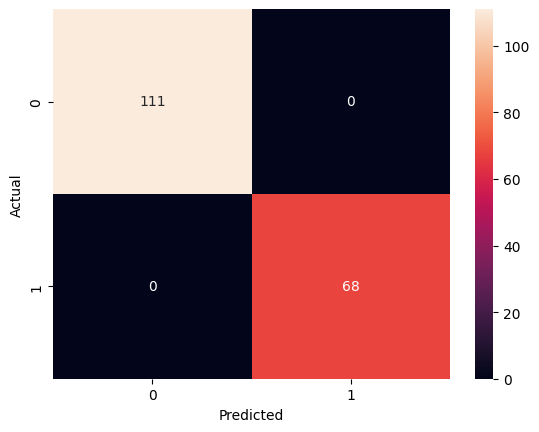

In [23]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')